# Sentiment Analysis with VAD NRC Lexicon
<table><tr>
<td> <img src="images/LOLGOP_tweet.png" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="images/patriot_tweet.png" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

* Below I will be analyzing the sentiment of my two corpora using the NRC VAD Lexicon

* Valence refers to positive, negative, pleasure, displeasure dimension 
* Arousal refers to excited, calm or active, passive dimension
* Dominance refers to feelings of being weak or in control dimension

* After finding the scores, I will graph the scores over time for both corpora

In [1]:
## load necessary packages
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TweetTokenizer, WordPunctTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

In [2]:
## load in the data
con_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/con_final_data.csv")
lib_data=pd.read_csv("/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data/liberal_data_final.csv")

In [3]:
##run functions
% run functions.ipynb

In [4]:
## load in NRC VAD Lexicon
NRC_VAD_lexicon = open('/Commjhub/jupyterhub/comm318_fall2019/joellegross/comm313_S21/comm313_S21_Final_Project/data_analysis/lexicons/NRC-VAD-Lexicon.txt').readlines()
NRC_VAD = {}
for line in NRC_VAD_lexicon[1:]:  
    word, V,A,D = line.strip().split('\t')
    NRC_VAD[word] = {'V': float(V), 
                     'A': float(A),
                     'D': float(D)}
tt=TweetTokenizer()

In [23]:
## process tweets function
def process_tweet(tweet):
    
    toks = tt.tokenize(tweet['text'])
    tweet['tokens'] = toks
    
    
    tweet['Valence']=0
    tweet['Dominance']=0
    tweet['Arousal']=0
    
    tweet['VAD_toks']=[]
    
    for t in toks:
        if t.lower() in NRC_VAD.keys():
            scores = NRC_VAD[t.lower()]
            scores['tok']=t
            
            tweet['Valence']+=scores['V']
            tweet['Arousal']+=scores['A']
            tweet['Dominance']+=scores['D']
            
            tweet['VAD_toks'].append(scores)
    
    
    for dimension in ('Valence','Arousal','Dominance'):
        if len(tweet['VAD_toks'])>0:
            tweet[dimension] /= len(tweet['VAD_toks'])
    

In [6]:
## create a dictionary, tokenize, and process tweets
con_dict=con_data.T.to_dict()
for  i in range(0, len(con_dict)):
    process_tweet(con_dict[i])

In [7]:
## create a dictionary, tokenize, and process tweets
lib_dict=lib_data.T.to_dict()
for  i in range(0, len(lib_dict)):
    process_tweet(lib_dict[i])

In [8]:
## create valence, dominance, arousal dataframe
valence=[]
dominance=[]
arousal=[]
created_at=[]
for i in range(0, len(con_dict)):
    valence.append(con_dict[i]["Arousal"])
    dominance.append(con_dict[i]["Dominance"])
    arousal.append(con_dict[i]["Valence"])
    created_at.append(con_dict[i]["created_at"])
con_df=pd.DataFrame()
con_df["Arousal"]=arousal
con_df["Dominance"]=dominance
con_df["Valence"]= valence
con_df["created_at"]=created_at
con_df.set_index(pd.to_datetime(con_df['created_at']), inplace=True)
con_df.sort_index(inplace=True)

In [9]:
## create valence, dominance, arousal dataframe
valence_lib=[]
dominance_lib=[]
arousal_lib=[]
created_at_lib=[]
for i in range(0, len(lib_dict)):
    valence_lib.append(lib_dict[i]["Arousal"])
    dominance_lib.append(lib_dict[i]["Dominance"])
    arousal_lib.append(lib_dict[i]["Valence"])
    created_at_lib.append(lib_dict[i]["created_at"])
lib_df=pd.DataFrame()
lib_df["Arousal"]=arousal_lib
lib_df["Dominance"]=dominance_lib
lib_df["Valence"]= valence_lib
lib_df["created_at"]=created_at_lib
lib_df.set_index(pd.to_datetime(lib_df['created_at']), inplace=True)
lib_df.sort_index(inplace=True)

In [10]:
def calculate_season_mean2(lib_df,con_df):
    season_lib=np.array_split((list(lib_df["created_at"].sort_values().unique())), 4)
    season_con=np.array_split((list(con_df["created_at"].sort_values().unique())), 4)
    for i in range(0,len(season_lib)):
        start_date=season_lib[i][0]
        end_date=season_lib[i][-1]
        time_lib = (lib_df['created_at'] > start_date) & (lib_df['created_at'] <= end_date)
        lib_now=lib_df[time_lib]
        start_date=season_con[i][0]
        end_date=season_con[i][-1]
        time_con = (con_df['created_at'] > start_date) & (con_df['created_at'] <= end_date)
        con_now=con_df[time_con]
        con_now["ideology"]="C"
        lib_now["ideology"]="L"
        mean=(con_now["Value"].mean()-lib_now["Value"].mean())
        means_list.append(mean)
        print("The difference in means for season",i, "is",mean)

# <center> Valence Sentiment </center>


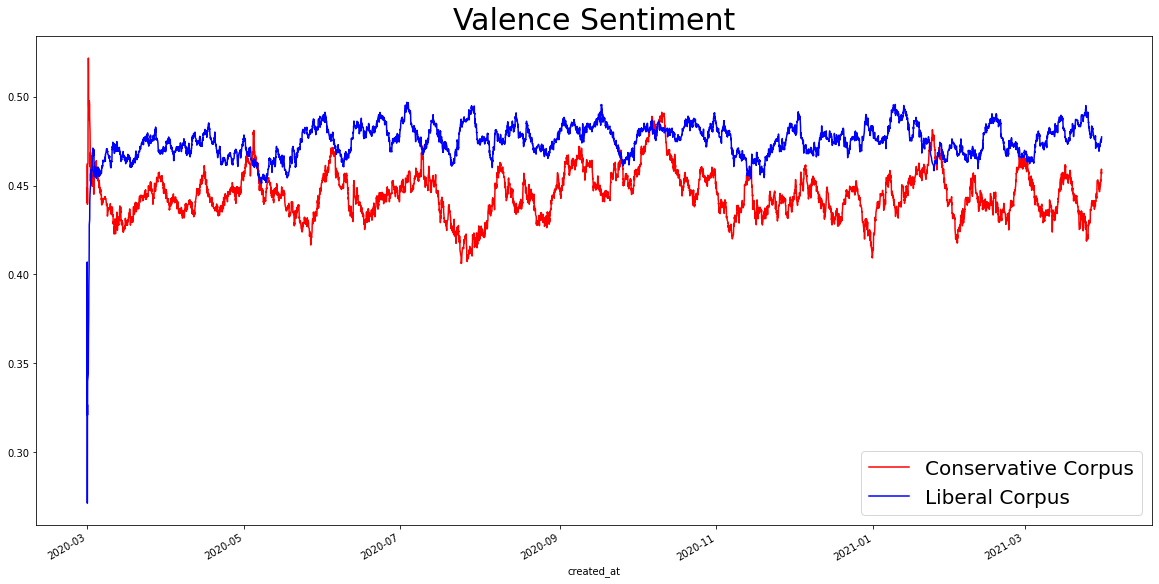

In [11]:
## plot valence over time
plt.figure(figsize=(20,10)) 
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
con_df['Valence'].rolling('7D').mean().fillna(0).plot(label="Conservative Corpus",color="red")
lib_df['Valence'].rolling('7D').mean().fillna(0).plot(label="Liberal Corpus",color="blue")
plt.legend(loc=4, prop={'size': 20})
plt.title("Valence Sentiment", fontsize=30)
plt.show();

In [12]:
## create a valence data frame for each corpora
lib_valence_df=pd.DataFrame()
con_valence_df=pd.DataFrame()

In [13]:
## add the data to the df
lib_valence_df["Value"]=lib_df["Valence"]
lib_valence_df["created_at"]=lib_df["created_at"]
con_valence_df["Value"]=con_df["Valence"]
con_valence_df["created_at"]=con_df["created_at"]
lib_valence_df.sort_index(inplace=True)
con_valence_df.sort_index(inplace=True)

The difference in means for season 0 is -0.026305770636337822
The difference in means for season 1 is -0.035724773116966535
The difference in means for season 2 is -0.0249423062854624
The difference in means for season 3 is -0.032827163719946206


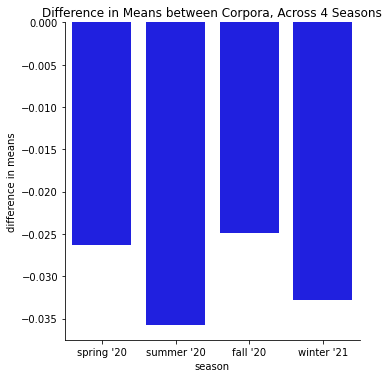

In [14]:
##calculate the difference in means per season
means_list=[]
calculate_season_mean2(lib_valence_df,con_valence_df)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="blue")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.show();

# <center> Arousal Sentiment </center>


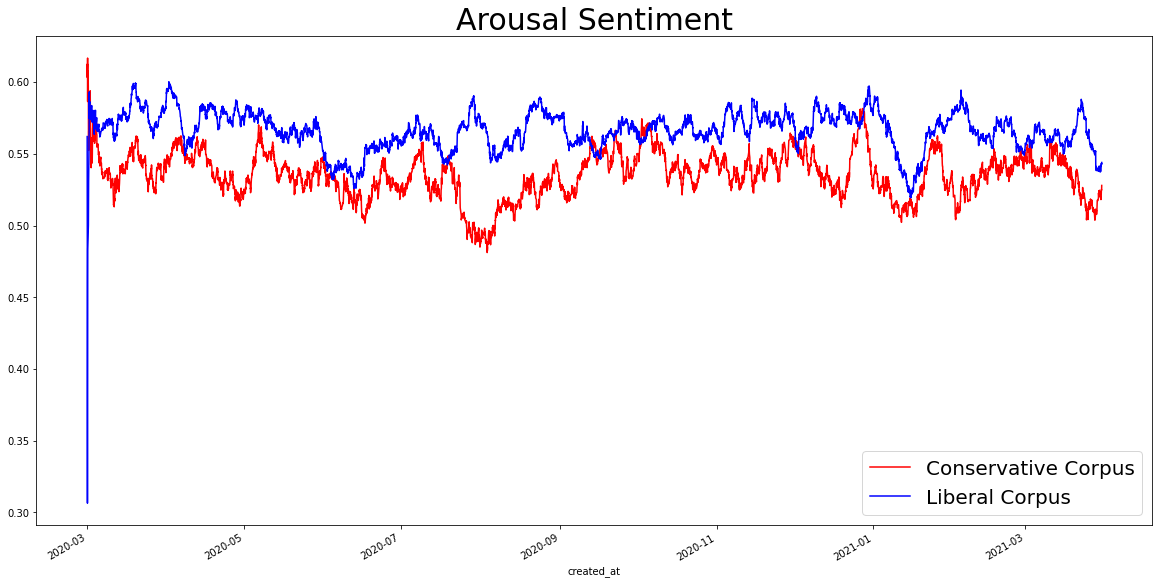

In [15]:
## plot arousal over time
plt.figure(figsize=(20,10)) 
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
con_df['Arousal'].rolling('7D').mean().fillna(0).plot(label="Conservative Corpus",color="red")
lib_df['Arousal'].rolling('7D').mean().fillna(0).plot(label="Liberal Corpus",color="blue")
plt.legend(loc=4, prop={'size': 20})
plt.title("Arousal Sentiment", fontsize=30)
plt.show();

In [16]:
## create arousal data frames 
lib_arousal_df=pd.DataFrame()
con_arousal_df=pd.DataFrame()

In [17]:
## add data to the data frames
lib_arousal_df["Value"]=lib_df["Arousal"]
lib_arousal_df["created_at"]=lib_df["created_at"]
con_arousal_df["Value"]=con_df["Arousal"]
con_arousal_df["created_at"]=con_df["created_at"]
lib_arousal_df.sort_index(inplace=True)
con_arousal_df.sort_index(inplace=True)

The difference in means for season 0 is -0.0317975879293787
The difference in means for season 1 is -0.039311651930012736
The difference in means for season 2 is -0.02414494808051748
The difference in means for season 3 is -0.029533912766354975


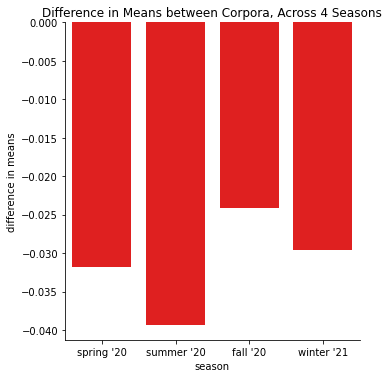

In [18]:
## calculate the difference in means per seasons
means_list=[]
calculate_season_mean2(lib_arousal_df,con_arousal_df)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="red")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.show();

# <center> Dominance Sentiment </center>


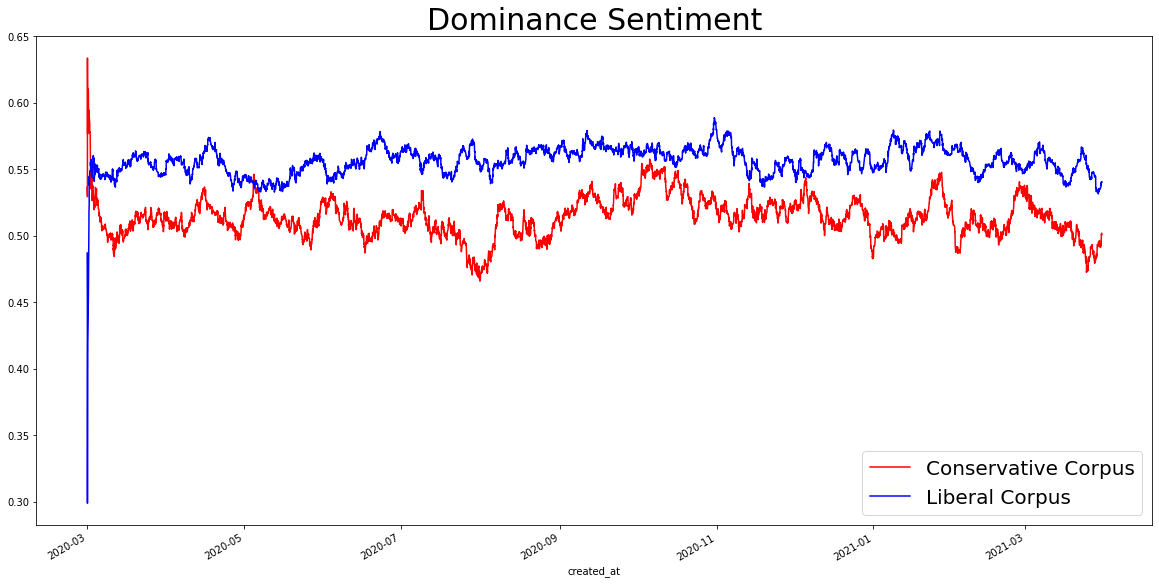

In [19]:
## plot dominance over time
plt.figure(figsize=(20,10)) 
plt.grid(color='gray', linestyle='-.', linewidth=0.7)
con_df['Dominance'].rolling('7D').mean().fillna(0).plot(label="Conservative Corpus",color="red")
lib_df['Dominance'].rolling('7D').mean().fillna(0).plot(label="Liberal Corpus",color="blue")
plt.legend(loc=4, prop={'size': 20})
plt.title("Dominance Sentiment", fontsize=30)
plt.show();

In [20]:
##create empty dominance data frame
lib_dominance_df=pd.DataFrame()
con_dominance_df=pd.DataFrame()

In [21]:
## add data to the dataframe
lib_dominance_df["Value"]=lib_df["Valence"]
lib_dominance_df["created_at"]=lib_df["created_at"]
con_dominance_df["Value"]=con_df["Valence"]
con_dominance_df["created_at"]=con_df["created_at"]
lib_dominance_df.sort_index(inplace=True)
con_dominance_df.sort_index(inplace=True)

The difference in means for season 0 is -0.026305770636337822
The difference in means for season 1 is -0.035724773116966535
The difference in means for season 2 is -0.0249423062854624
The difference in means for season 3 is -0.032827163719946206


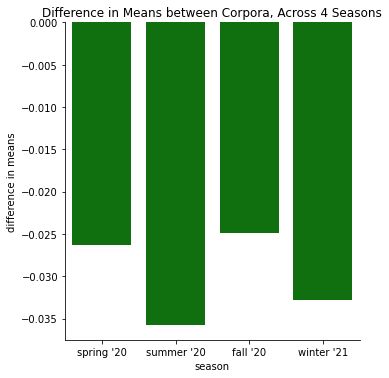

In [22]:
## calculate the difference means per season
means_list=[]
calculate_season_mean2(lib_dominance_df,con_dominance_df)
seasons_list=["spring '20", "summer '20", "fall '20", "winter '21"]
df=pd.DataFrame()
df["season"]=seasons_list
df["difference in means"]= means_list
sns.catplot(x="season", y="difference in means", data=df, kind="bar", color="green")
plt.title("Difference in Means between Corpora, Across 4 Seasons")
plt.show();

# <center> VAD Analysis Observations/Conclusions</center>

<img src="images/brains.png" alt="Drawing" style="width: 400px;"/>

* For all three VAD dimensions-- valence, arousal, and dominance-- the liberal corpus has higher values than the conservative corpus

* As we can see in the difference of means tests, in all three conditions, the summer has the greatest difference between the liberal and conservative corpus. In this season, liberals express the highest level of dominance, arousal, and positivity.

* As we have seen throughout the analysis, the liberal corpus has over-represented relative to the conservative corpus on many levels in terms of pandemic conversation, and this is another dimension where this is the case
